# Задание 2

Изучите результаты теста и сделайте вывод, увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

## Подготовка данных

In [1]:
import numpy as np

from scipy import stats
from statsmodels.stats import weightstats as stests

import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/dde42b1a-a0a5-4055-8fea-38ae97cb3c41.csv')
print(df.columns.values)
print()
df.info()

['group' 'client_id' 'avg_sum']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   group      600 non-null    object 
 1   client_id  600 non-null    int64  
 2   avg_sum    600 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.2+ KB


In [3]:
df

,group,client_id,avg_sum
0,test,1,156.686451
1,test,2,342.625859
2,test,3,79.712120
3,test,4,493.110807
4,test,5,124.135016
...,...,...,...
595,control,596,209.075972
596,control,597,57.990291
597,control,598,42.577037
598,control,599,178.320097


## Проверка на зависимость

In [5]:
# test and control groups
test = df[df.group == 'test'].avg_sum.to_numpy()
control = df[df.group == 'control'].avg_sum.to_numpy()

print("test size: " + str(test.shape) + " control size: " + str(control.shape))

test size: (306,) control size: (294,)


In [6]:
# Is there any depencies?
df.client_id.unique().shape

(600,)

Выборки независимы, поскольку число уникальных элементов равно общему числу элементов. 

## Проверка на нормальность

Построим графики распределения таргета по его частоте появления

No handles with labels found to put in legend.


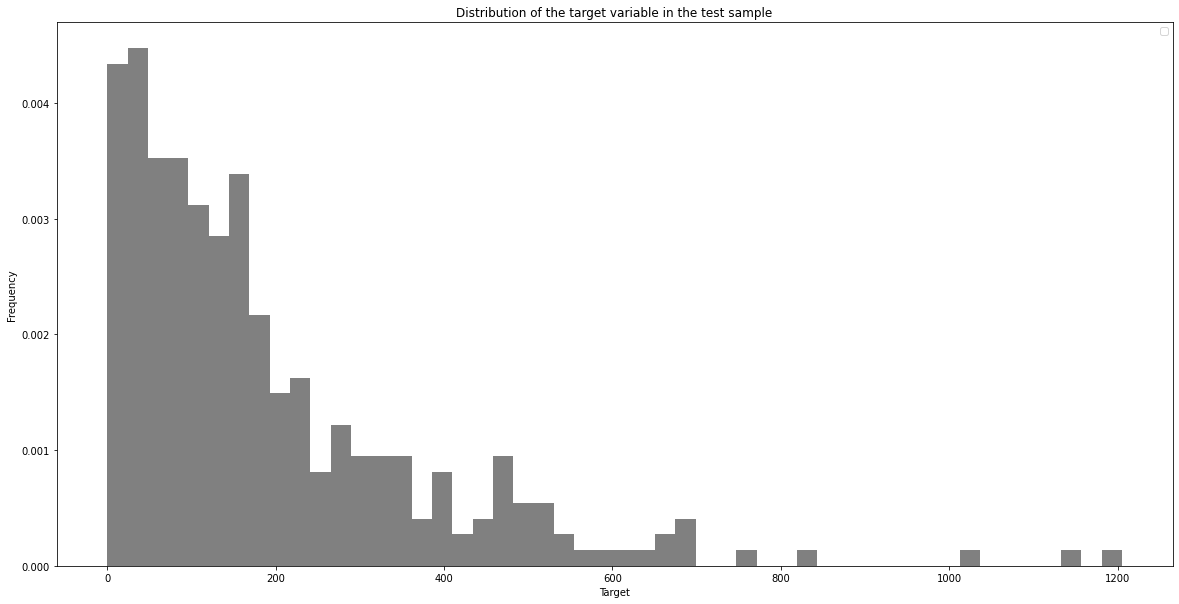

In [7]:
plt.figure(figsize=(20,10))
plt.hist(test, bins=50, density=True, color='gray')
plt.legend()
plt.title('Distribution of the target variable in the test sample')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

No handles with labels found to put in legend.


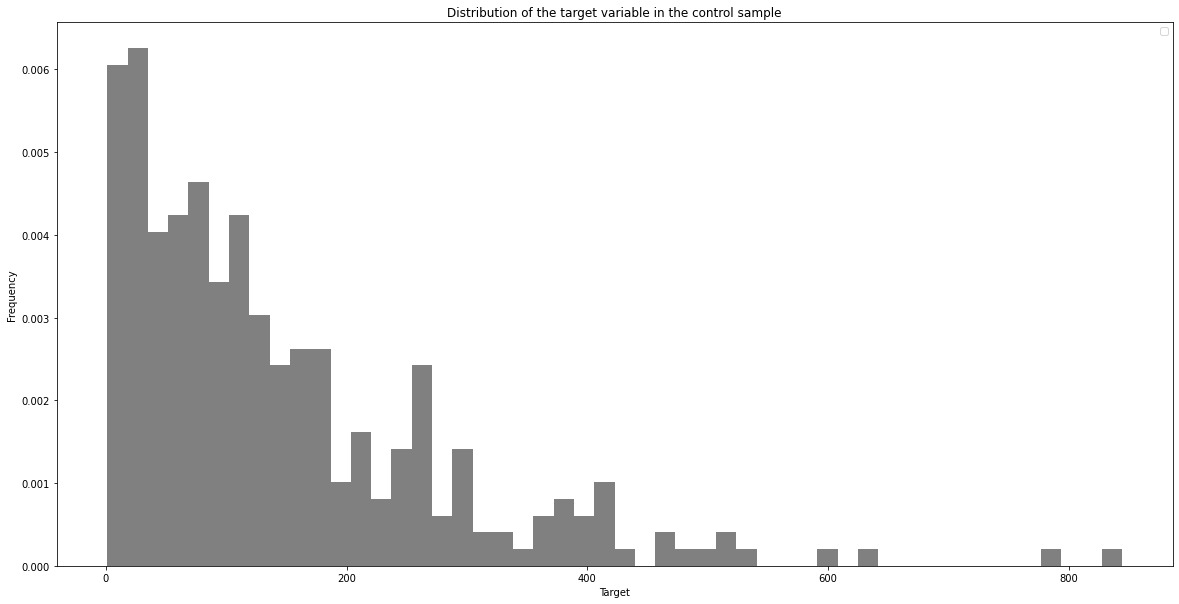

In [8]:
plt.figure(figsize=(20,10))
plt.hist(control, bins=50, density=True, color='gray')
plt.legend()
plt.title('Distribution of the target variable in the control sample')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

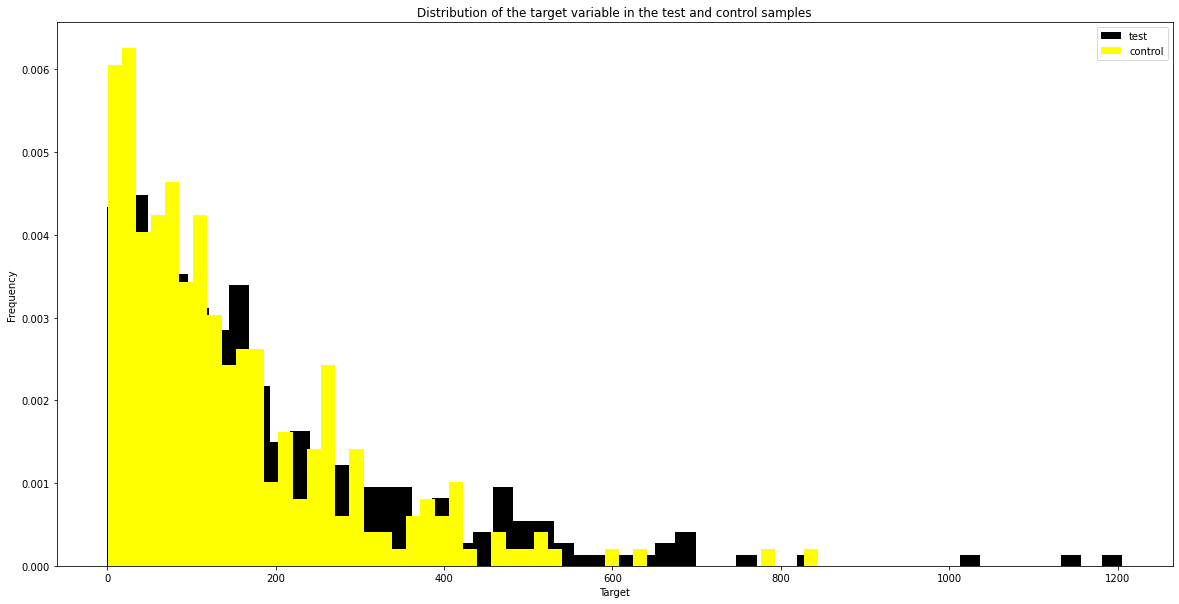

In [9]:
plt.figure(figsize=(20,10))
plt.hist(test, bins=50, density=True, color='black', label='test')
plt.hist(control, bins=50, density=True, color='yellow', label='control')
plt.legend()
plt.title('Distribution of the target variable in the test and control samples')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Распределения близки к экспоненциальным, есть смысл двигаться дальше

Проверим на нормальность с помощью построения Q-Q графика

Text(0.5, 1.0, 'Control sample')

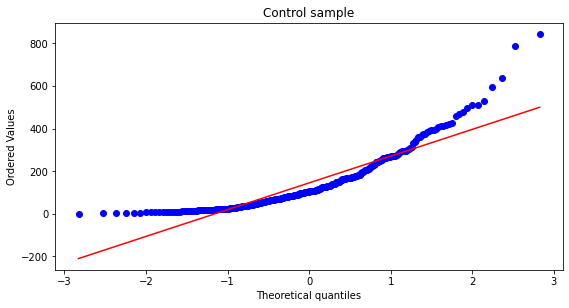

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
stats.probplot(control, dist="norm", plot=plt)
plt.title('Control sample')

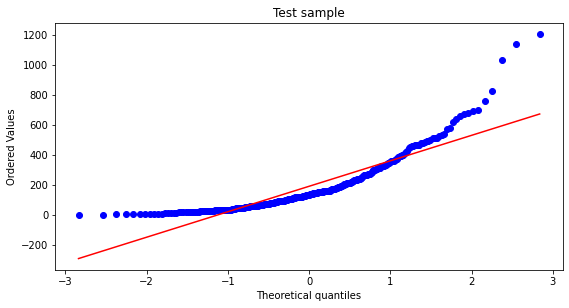

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
stats.probplot(test, dist="norm", plot=plt)
plt.title('Test sample')
plt.show()

Сделаем тест Колмогорова-Смирнова

In [12]:
print(stats.kstest(control, 'norm'))
print(stats.kstest(test, 'norm'))

KstestResult(statistic=0.9960423069313241, pvalue=0.0)
KstestResult(statistic=0.9916670995681639, pvalue=0.0)


Распределения не нормальные

## Проверим ранговый критерий Манна-Уитни

In [13]:
stats.mannwhitneyu(test, control, alternative ='greater')

MannwhitneyuResult(statistic=50943.0, pvalue=0.0024922812779452318)

Выборки относятся к одному распределению. Сумма чека увеличилась